<a href="https://colab.research.google.com/github/anubhawbhalotia/Machine-Learning-by-Stanford-University/blob/master/Programming_Ex_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programming Ex 1 Part 1**

## **Linear regression with one variable**

In [2464]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2465]:
path = 'ex1data1.txt'
data = pd.read_csv(path, header=None, names=['Population', 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [2466]:
data.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


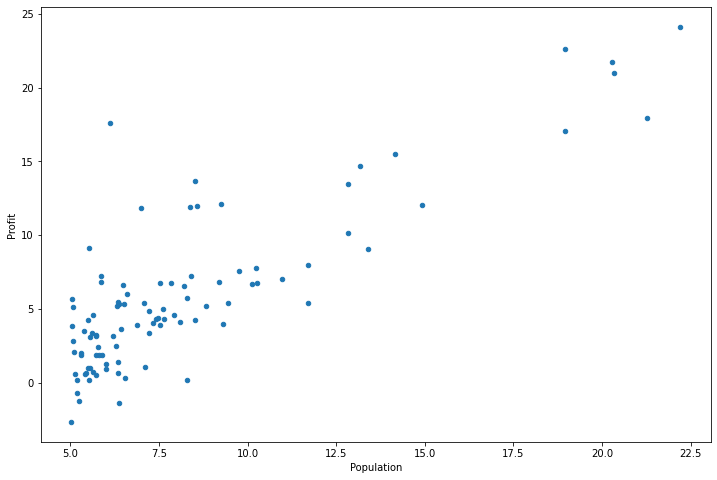

In [2467]:
data.plot(kind='scatter', x='Population', y='Profit', figsize=(12,8))

In [2468]:
def computeCost(X, y, theta):
    inner = np.power((np.dot(X, theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

In [2469]:
# append a ones column to the front of the data set
data.insert(0, 'Ones', 1)
data

,Ones,Population,Profit
0,1,6.1101,17.59200
1,1,5.5277,9.13020
2,1,8.5186,13.66200
3,1,7.0032,11.85400
4,1,5.8598,6.82330
...,...,...,...
92,1,5.8707,7.20290
93,1,5.3054,1.98690
94,1,8.2934,0.14454
95,1,13.3940,9.05510


In [2470]:
# set X (training data) and y (target variable)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]

In [2471]:
cols

3

In [2472]:
X

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598
...,...,...
92,1,5.8707
93,1,5.3054
94,1,8.2934
95,1,13.3940


In [2473]:
y

,Profit
0,17.59200
1,9.13020
2,13.66200
3,11.85400
4,6.82330
...,...
92,7.20290
93,1.98690
94,0.14454
95,9.05510


In [2474]:
# convert from data frames to numpy array
X = np.array(X.values)
y = np.array(y.values)
# initial theta values
theta = np.array([[0,0]])

In [2475]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

In [2476]:
computeCost(X, y, theta)

32.072733877455676

In [2477]:
def gradientDescent(X, y, theta, alpha, iters):
    temp = np.zeros(theta.shape)
    print(temp)
    parameters = int(theta.ravel().shape[0])
    print(parameters)
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = np.dot(X, theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, np.reshape(X[:,j], (X[:,j].size, 1)))
            temp[0,j] = theta[0,j] - ((alpha / int(X.shape[0])) * np.sum(term))
            
        theta = temp
        cost[i] = computeCost(X, y, theta)
        
    return theta, cost

In [2478]:
# initialize variables for learning rate and iterations
alpha = 0.01
iters = 1000

# perform gradient descent to "fit" the model parameters
g, cost = gradientDescent(X, y, theta, alpha, iters)
g

[[0. 0.]]
2


array([[-3.24140214,  1.1272942 ]])

In [2479]:
# final cost after iters iterations
cost[cost.size - 1]

4.515955503078912

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

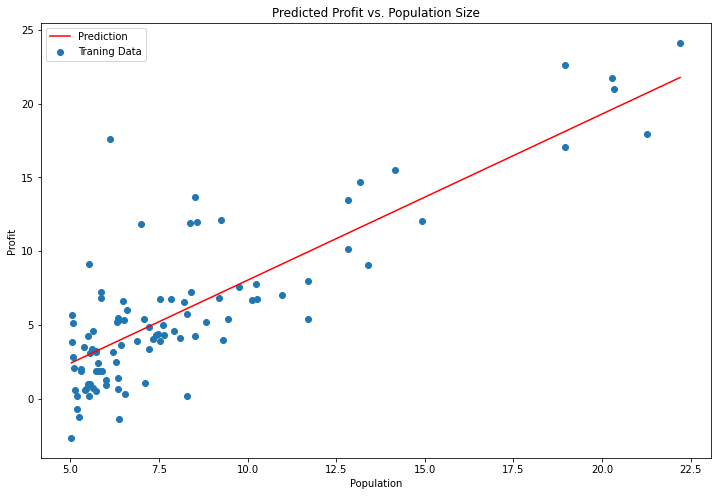

In [2480]:
x = np.linspace(data.Population.min(), data.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(data.Population, data.Profit, label='Traning Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

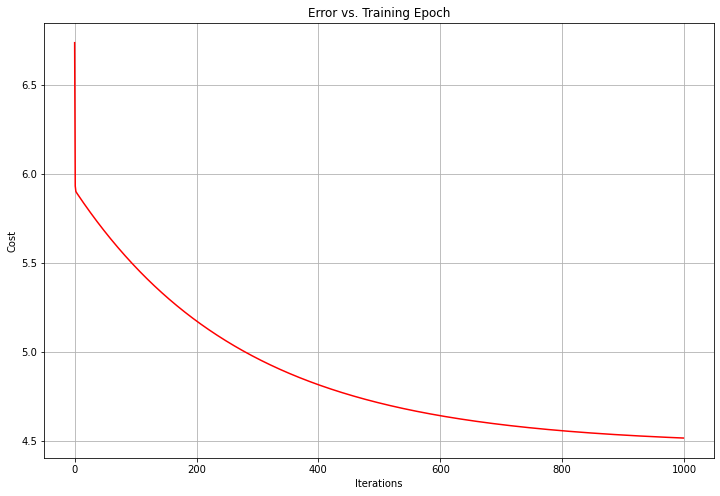

In [2481]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
ax.grid(True)

## **Linear regression with multiple variables**

In [2482]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [2483]:
data2 = (data2 - data2.mean()) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [2484]:
# add ones column
data2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[:,0:cols-1]
y2 = data2.iloc[:,cols-1:cols]

In [2485]:
cols

4

In [2486]:
X2

,Ones,Size,Bedrooms
0,1,0.130010,-0.223675
1,1,-0.504190,-0.223675
2,1,0.502476,-0.223675
3,1,-0.735723,-1.537767
4,1,1.257476,1.090417
5,1,-0.019732,1.090417
6,1,-0.587240,-0.223675
7,1,-0.721881,-0.223675
8,1,-0.781023,-0.223675
9,1,-0.637573,-0.223675


In [2487]:
y2

,Price
0,0.475747
1,-0.084074
2,0.228626
3,-0.867025
4,1.595389
5,-0.323998
6,-0.204036
7,-1.130948
8,-1.026973
9,-0.783051


In [2488]:
# convert from data frame to numpy array
X2 = np.array(X2.values)
y2 = np.array(y2.values)
# initial theta values
theta2 = np.array([[0,0,0]])

In [2489]:
computeCost(X2, y2, theta2)

0.48936170212765967

In [2490]:
# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

[[0. 0. 0.]]
3


0.13070336960771892

Text(0.5, 1.0, 'Error vs. Training Epoch')

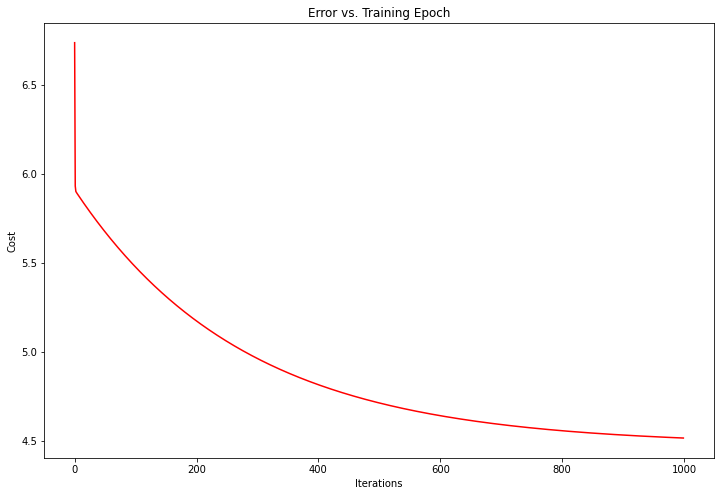

In [2491]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [2492]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X2, y2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

[[ 0.          0.88476599 -0.05317882]]
[-3.  -3.  -3.  ...  2.9  2.9  2.9]


Text(0.5, 0.92, 'Predicted Price vs. Size and Bedrooms')

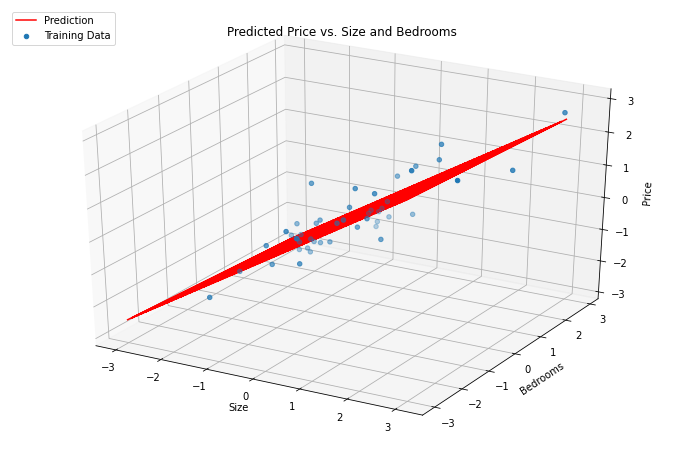

In [2493]:
from mpl_toolkits.mplot3d import axes3d
x = []
y = []
on = []
for i in np.arange(-3, 3, 0.1):
    for j in np.arange(-3, 3, 0.1):
        x.append(i)
        y.append(j)
        on.append(1)

x = np.asarray(x)
y = np.asarray(y)
on = np.asarray(on)
f = np.array(model.predict(X2).ravel())
coef = model.coef_
print(coef)
z = (coef[0, 0] * on) + (coef[0, 1] * x) + (coef[0, 2] * y)
print(x)
fig = plt.figure(figsize=(12,8))
ax = plt.axes(projection='3d')

point = np.array([0, 0, f[0]])
ax.plot3D(x, y, z, 'r', label='Prediction')
ax.scatter3D(data2.Size, data2.Bedrooms, data2.Price, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Size')
ax.set_ylabel('Bedrooms')
ax.set_zlabel('Price')
ax.set_title('Predicted Price vs. Size and Bedrooms')